## Постановка задачи

Для изучения машинного обучения мы возьмем данные популярного соревнования data science с международной платформы Kaggle (https://www.kaggle.com/c/titanic).

**Задача** звучит так: необходимо создать модель машинного обучения, которая предсказывает, кто из пассажиров пережил кораблекрушение «Титаника».

В процессе подготовки и обучения будем использовать два датасета: 
*  **train.csv** — часть набора данных для создания модели (обучающая выборка), содержит 12 полей;
*  **test.csv**  — часть набора данных для проверки модели (тестовая выборка), содержит 11 полей.

### Обучающая выборка

Переменные:

* Passengerld — идентификатор пассажира
* Survival    — поле, где указано, выжил человек (1) или нет (0)
* Pclass      — класс каюты (первый класс - 1, второй класс - 2, третий класс - 3)
* Name        — имя пассажира
* Sex         — пол пассажира
* Age         — возраст пассажира
* SibSp       — количество родственников на борту 2-го порядка (братья, сестры, муж, жена)
* Parch       — количество родственников на борту 1-го порядка (мать, отец, дети)
* Ticket      — номер билета пассажира
* Fare        — цена билета пассажира
* Cabin       — поле указывает, в какой каюте размещается пассажир
* Embarked    — порт посадки на корабль (C - Cherbourg, Q - Queenston, S - Southampton)


### Представление файла train.csv в MS Excel
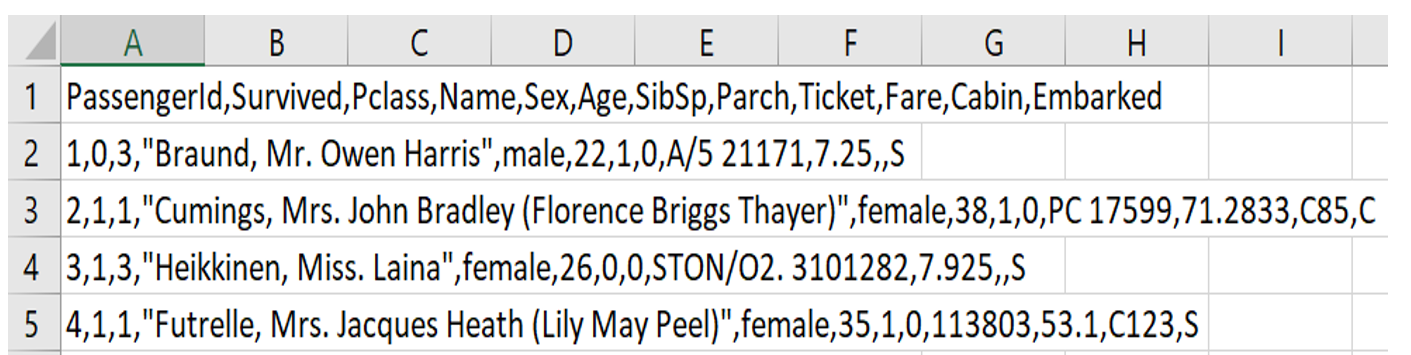

### Подключаем основные библиотеки

In [1]:
# Библиотека Pandas предлагает очень удобные инструменты для хранения данных и работы с ними.
import pandas as pd

### Чтение данных из файла

In [2]:
df = pd.read_csv("data/train.csv", index_col = 'PassengerId') #Загружаем данные обучающей выборки из файла train

In [3]:
dt = pd.read_csv("data/test.csv", index_col = 'PassengerId')  #Загружаем данные тестовой выборки из файла test

In [4]:
df.head()  #Возвращаем строки файла train (по умолчанию первые 5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Методы для вывода информации о датафрейме

* **.shape**   — количество строк и колонок в датафрейме
* **.columns** — название колонок
* **.index**   — индексирование строк
* **.dtypes**  — типы данных каждой колонки

### Основная информация о датасете

In [5]:
print(df.shape) #Размер датафрема с обучающей выборкой

(891, 11)


In [6]:
print(dt.shape) #Размер датафрема с тестовой выборкой

(418, 10)


In [7]:
print(df.columns) #Названия признаков (колонок) файла train

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [8]:
print(dt.columns) #Названия признаков файла test

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')


In [9]:
print(df.dtypes) #Типы данных файла train

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object


In [10]:
print(dt.index) #Индексация строк файла test

Int64Index([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,
            ...
            1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309],
           dtype='int64', name='PassengerId', length=418)


### Индексация и извлечение данных

In [11]:
df['Survived'].head(10) #Просмотр только одного признака (Survived), вывод первых 10 элементов

PassengerId
1     0
2     1
3     1
4     1
5     0
6     0
7     0
8     0
9     1
10    1
Name: Survived, dtype: int64

### Атрибут .loc
Метод .loc[строка, столбец] даёт доступ к элементу по строке и по столбцу: 
 1. Одна ячейка — .loc[7, 'название столбца']
 2. Один столбец — .loc[:,'название столбца']
 3. Несколько стобцов — .loc[:,['название столбца','название столбцов']]
 4. Несколько столбцов подряд (срез) — .loc[:,'login','pass']
 5. Одна строка — .loc[1]
 6. Все строки, начиная с заданной — .loc[1:]
 7. Все строки до заданной — .loc[:3]
 8. Несколько строк подряд (срез) — .loc[2:5]

In [12]:
df.loc[2:5, 'Pclass':'SibSp'] #Пример использования атрибута .loc

,Pclass,Name,Sex,Age,SibSp
PassengerId,,,,,
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1
3,3,"Heikkinen, Miss. Laina",female,26.0,0
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1
5,3,"Allen, Mr. William Henry",male,35.0,0


In [13]:
df.iloc[2:5, 1:5] #Индексирование на основе целочисленного местоположения для выбора по позиции

,Pclass,Name,Sex,Age
PassengerId,,,,
3,3,"Heikkinen, Miss. Laina",female,26.0
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
5,3,"Allen, Mr. William Henry",male,35.0


In [14]:
df[-2:] #Вывод последних строк таблицы

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### Иформация о признаках

In [15]:
df.head()  #Возвращение строк файла train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
print(df.info()) #Этот метод показывает информацию о датафрейме, включая индекс, 
# тип столбца, ненулевые значения и использование памяти.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 123.5+ KB
None


In [17]:
 dall = pd.concat([df, dt], sort=False) #Объединение обучающей и тестовой выборок df и dt и сохранение в переменную dall

In [18]:
df.shape #Возвращает размерность файла train

(891, 11)

In [19]:
dt.shape #Возвращает размерность файла test

(418, 10)

In [20]:
dall.shape #Возвращает размерность объедененных записей

(1309, 11)

In [21]:
df = df.drop('Cabin', axis = 1) #Удаление колонки признака Cabin

In [22]:
df = df.dropna() #Удаление всех строк, содержащих значения None

In [23]:
df.shape #Возвращает размерность файла train после удаления значений None и признака Cabin

(712, 10)

In [24]:
df['Survived'].value_counts() #Возвращает серию, содержащую количество уникальных значений

0    424
1    288
Name: Survived, dtype: int64

In [25]:
df['Survived'] = df['Survived'].astype(bool) #Перекодировка признака Survived:  0 - не выжил, 1 - выжил

In [26]:
df['Survived'].value_counts() #Возвращает перекодированные значения

False    424
True     288
Name: Survived, dtype: int64

In [27]:
df['Survived'] = df['Survived'].astype(int) #Перекодировка по типу

In [28]:
df['Survived'].value_counts()

0    424
1    288
Name: Survived, dtype: int64

In [29]:
df['Sex'].value_counts() #Возвращаем серии колонки Sex

male      453
female    259
Name: Sex, dtype: int64

In [30]:
sex = {'male':0, 'female':1} #Перекодируем значения в словаре sex: male заменяем на 0, а female - 1. 
df['Sex'] = df['Sex'].map(sex) #Метод map используют для замены каждого значения в серии другим значением. В нашем случае замена из словаря sex.

In [31]:
df['Sex'].value_counts(normalize=True) #Определяем процентное соотношение мужчин и женщин

0    0.636236
1    0.363764
Name: Sex, dtype: float64

In [32]:
df['Embarked'].value_counts()  #Выводим значения признака Embarked

S    554
C    130
Q     28
Name: Embarked, dtype: int64

In [33]:
emb = {'Q':0, 'C':1, 'S':2} #Создаем словарь соответствия для признака
df = df.replace({'Embarked':emb}) #Заменяем значения признака 'Embarked' на значения словаря emb

In [34]:
df.head() #Как видно столбец Embarked изменился и теперь мы можем рассчитать соотношение

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,2
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,2


In [35]:
df.describe()# Метод .describe анализирует как числовые признаки, так и категориальные, а также наборы столбцов смешанных типов данных. 
            #Вывод зависит от представления статистических характеристик.

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,0.363764,29.642093,0.514045,0.432584,34.567251,1.738764
std,0.491139,0.836854,0.481420,14.492933,0.930692,0.854181,52.938648,0.521561
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,20.000000,0.000000,0.000000,8.050000,2.000000
50%,0.000000,2.000000,0.000000,28.000000,0.000000,0.000000,15.645850,2.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,33.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200,2.000000


In [36]:
df.describe(include=['object', 'bool']) #Использование метода .describe для нечисловых признаков

,Name,Ticket
count,712,712
unique,712,541
top,"Barton, Mr. David John",347082
freq,1,7


In [37]:
df['Age'].mean() #Опеределяем средний возраст пассажиров «Титаника»

29.64209269662921

In [38]:
df[df['Survived'] == 1].mean() #Найдем среднее значение всех признаков для выживших пассажиров

Survived     1.000000
Pclass       1.878472
Sex          0.677083
Age         28.193299
SibSp        0.496528
Parch        0.531250
Fare        51.647672
Embarked     1.670139
dtype: float64

In [39]:
df[df['Survived'] == 0]['Age'].mean() #Средний возраст погибших пассажиров

30.62617924528302

In [40]:
df[(df['Survived'] == 1) & (df['Sex'] == 1)]['Fare'].min() #Средний возраст выживших пассажиров-мужчин по стоимости билета (Fare)

7.225

In [41]:
import numpy as np #Подключение библиотеки Numpy

In [42]:
df.apply(np.max)  #Метод .max выводит максимальные данные признаков в датафрейме

Survived                                  1
Pclass                                    3
Name        van Billiard, Mr. Austin Blyler
Sex                                       1
Age                                      80
SibSp                                     5
Parch                                     6
Ticket                            WE/P 5735
Fare                                512.329
Embarked                                  2
dtype: object

In [43]:
df.apply(np.max)['Age'] #Определяем максимальный возраст среди пассажиров

80.0

In [44]:
np.mean(df,0)['Age'] #Находим средний возраст в датафрейме train 

29.64209269662921

In [45]:
np.mean(dt,0)['Age'] #Находим средний возраст в датафрейме test

30.272590361445783

In [46]:
np.mean(dall,0)['Age'] #Находим средний возраст в объединенном датафрейме dall

29.881137667304014

In [47]:
df[df['Fare'].apply(lambda fare: fare > 100)].head() #Используем функцию labda, чтобы посмотреть признак fare > 100

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
28,0,1,"Fortune, Mr. Charles Alexander",0,19.0,3,2,19950,263.0000,2
89,1,1,"Fortune, Miss. Mabel Helen",1,23.0,3,2,19950,263.0000,2
119,0,1,"Baxter, Mr. Quigg Edmond",0,24.0,0,1,PC 17558,247.5208,1
196,1,1,"Lurette, Miss. Elise",1,58.0,0,0,PC 17569,146.5208,1
216,1,1,"Newell, Miss. Madeleine",1,31.0,1,0,35273,113.2750,1


### Сортировка

In [48]:
df.sort_values(by = 'Pclass', ascending = True).head() #Сортировка пассажиров по возрастанию значения признака Pclass (asceding = True), аргумент asceding = False сортирует данные по убыванию признака. 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
731,1,1,"Allen, Miss. Elisabeth Walton",1,29.00,0,0,24160,211.3375,2
306,1,1,"Allison, Master. Hudson Trevor",0,0.92,1,2,113781,151.5500,2
308,1,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",1,17.00,1,0,PC 17758,108.9000,1
310,1,1,"Francatelli, Miss. Laura Mabel",1,30.00,0,0,PC 17485,56.9292,1
311,1,1,"Hays, Miss. Margaret Bechstein",1,24.00,0,0,11767,83.1583,1


In [49]:
df.sort_values(by = ['Survived', 'Fare'], ascending = [True, False]).head #Cортировка датафрейма по двум признакам

<bound method NDFrame.head of              Survived  Pclass                               Name  Sex   Age  \
PassengerId                                                                   
28                  0       1     Fortune, Mr. Charles Alexander    0  19.0   
439                 0       1                  Fortune, Mr. Mark    0  64.0   
119                 0       1           Baxter, Mr. Quigg Edmond    0  24.0   
378                 0       1          Widener, Mr. Harry Elkins    0  27.0   
333                 0       1          Graham, Mr. George Edward    0  38.0   
...               ...     ...                                ...  ...   ...   
554                 1       3  Leeni, Mr. Fahim ("Philip Zenni")    0  22.0   
876                 1       3   Najib, Miss. Adele Kiamie "Jane"    1  15.0   
128                 1       3          Madsen, Mr. Fridtjof Arne    0  24.0   
805                 1       3            Hedman, Mr. Oskar Arvid    0  27.0   
272                 1 

### Методы группировки данных

In [50]:
columns_to_show = ['Age', 'Fare']
df.groupby(['Survived'])[columns_to_show].describe(percentiles=[]) #Метод .groupby группирует данные по признаку Survived. Аргумент percentiles пропускает квартили

Age                                           Fare             \
          count       mean        std   min   50%   max  count       mean   
Survived                                                                    
0         424.0  30.626179  14.172110  1.00  28.0  74.0  424.0  22.965456   
1         288.0  28.193299  14.859146  0.42  28.0  80.0  288.0  51.647672   

                                             
                std  min      50%       max  
Survived                                     
0         31.448825  0.0  11.8875  263.0000  
1         70.664499  0.0  26.2500  512.3292

In [51]:
#Метод .agg позволяет точнее задать необходимые статистические характеристики
df.groupby(['Survived'])[columns_to_show].agg([np.mean, np.std, np.min, np.max])

Age                              Fare                  \
               mean        std  amin  amax       mean        std amin   
Survived                                                                
0         30.626179  14.172110  1.00  74.0  22.965456  31.448825  0.0   
1         28.193299  14.859146  0.42  80.0  51.647672  70.664499  0.0   

                    
              amax  
Survived            
0         263.0000  
1         512.3292

### Методы создания сводных таблиц

In [52]:
#Метод .crosstab создает сводную таблицу 
pd.crosstab(df['Survived'], df['Pclass']) #Создаем сводную таблицу по признакам класса проезда пассажира и выживанию

Pclass,1,2,3
Survived,,,
0,64,90,270
1,120,83,85


In [53]:
#Методом .pivot_table также можно создать сводную таблицу. В первых аргументах записаны интересующие признаки. В аргументе aggfunc сохраняем признак, по которому идет ранжирование (медиана)
df.pivot_table(['Age', 
                'Fare'], ['Pclass'], 
               aggfunc='median').head()

,Age,Fare
Pclass,,
1,37.0,67.9500
2,29.0,15.0458
3,24.0,8.0500


### Добавление новых признаков

In [54]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,2
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,2


In [55]:
#insert - позволяет добавить новый признак
smth = df['Age'] + df['Fare'] + \
              df['Parch'] + df['Embarked']
df.insert(loc=len(df.columns), column='Smth', value=smth) #Добавляем в конец призрак Smth, в котором складываются Age, Fare, Parch, Embarked 
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Smth
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,2,31.2500
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,110.2833
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,2,35.9250
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,2,90.1000
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,2,45.0500


In [56]:
#Второй способ добавить признак в базу данных
df['One_more'] = df['Age'] + df['Fare'] + \
              df['Parch'] + df['Embarked']
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Smth,One_more
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,2,31.2500,31.2500
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,110.2833,110.2833
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,2,35.9250,35.9250
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,2,90.1000,90.1000
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,2,45.0500,45.0500
